# Sport Data Challenge 2019 data exploration notebook

This notebook contains some simple data exploration for all the data that is available for this challenge

# Course data exploration

In [15]:
from pathlib import Path

import pandas as pd
from ipyleaflet import Map, Polyline

%matplotlib inline

In [12]:
amsterdam_course = pd.read_csv('../courses/amsterdam_marathon.csv')

In [13]:
race_locations = zip(amsterdam_course['latitude'].to_list(), amsterdam_course['longitude'].to_list())
line = Polyline(
    locations = [[race_locations]],
    color="red",
    fill=False,
    weight=3
)
m = Map(center = (amsterdam_course['latitude'].mean(), amsterdam_course['longitude'].mean()))
m.add_layer(line)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

Because the interactive map doesn't render on Github here is a screenshot of the output of the previous cell:
![amsterdam_marathon_course_map.png](amsterdam_marathon_course_map.png)

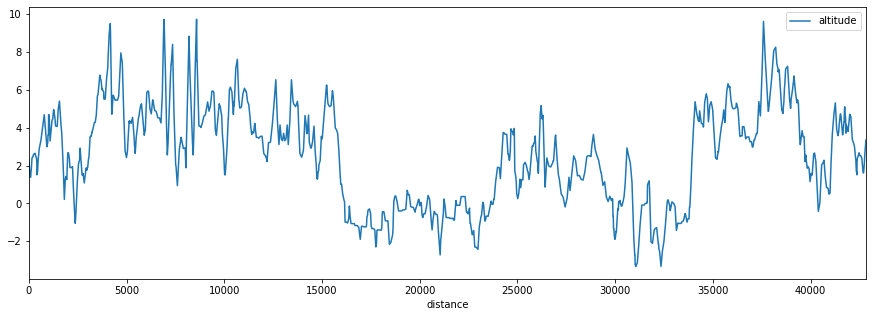

In [18]:
amsterdam_course.plot(x='distance', y='altitude', figsize=(15, 5))

## Race results

In [38]:
from pathlib import Path

import pandas as pd

%matplotlib inline

In [39]:
race_results = pd.read_csv(Path('data', 'race_results', 'results.csv'))

In [40]:
race_results['distance'].value_counts()

16090    127809
21097     84281
42195     50083
8047      31481
8000      23307
21096     13824
10000     11757
1000      11736
10548     10649
600        5734
21195      4764
30000      4125
16093      4019
2200       3291
700        3270
1200       2624
1800       1184
59097       876
8045        628
42192       262
1400        261
2600          9
Name: distance, dtype: int64

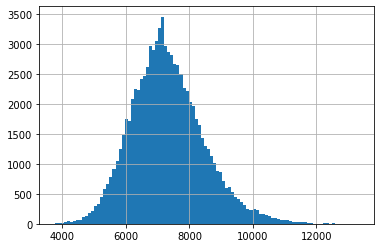

In [5]:
race_results.loc[race_results['distance'] == 21097]['chip_time_seconds'].hist(bins=100)

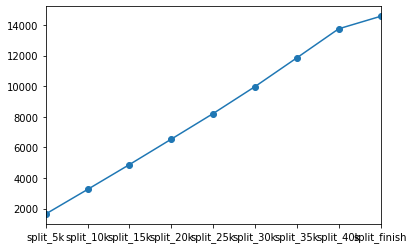

In [11]:
split_columns = [f'split_{n}' for n in ['5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k', 'finish']]
race_results.loc[race_results['distance'] == 42195][split_columns].mean().T.plot(marker='o', legend=False)

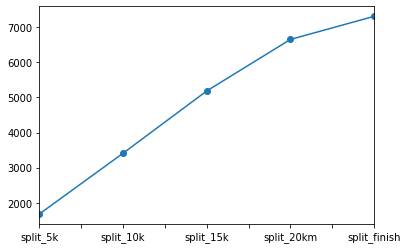

In [44]:
split_columns = [f'split_{n}' for n in ['5k', '10k', '15k', '20km', 'finish']]
race_results.loc[race_results['distance'] == 21097][split_columns].mean().T.plot(marker='o', legend=False)

In [43]:
race_results.columns

Index(['id', 'hashed_name', 'event_name', 'date', 'race', 'distance',
       'category', 'gun_time_seconds', 'chip_time_seconds', 'split_5k',
       'split_10k', 'split_15k', 'split_20k', 'split_half', 'split_25k',
       'split_30k', 'split_35k', 'split_40k', 'split_finish', 'split_4k',
       'split_5km', 'split_3km', 'split_6km', 'split_20km', 'split_24km',
       'split_25km', 'split_29km', 'split_10km', 'split_15km', 'split_19,5km'],
      dtype='object')

# Weather data

In [14]:
from pathlib import Path

import pandas as pd

%matplotlib inline

In [16]:
weather_df = pd.read_csv(Path('data', 'weather', 'weather_data.csv'))

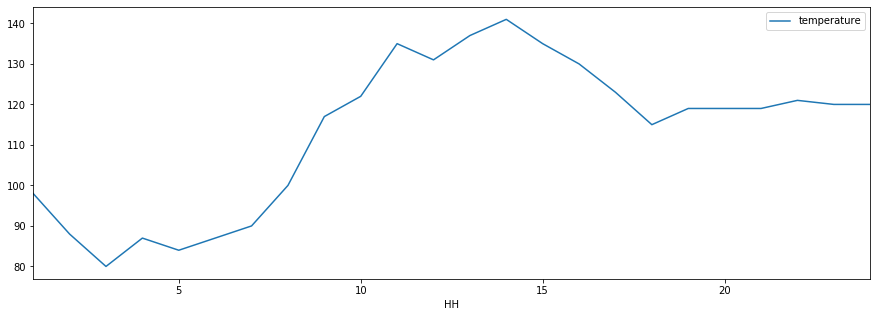

In [36]:
weather_df.loc[weather_df['date'] == '2019-10-20'].plot(x='HH', y='T', label='temperature', figsize=(15, 5))